In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("Statistics")
using CSV, DataFrames, Plots, Statistics


    Updating registry at `C:\Users\julie\.julia\registries\General.toml`


   Resolving package versions...


  No Changes to `C:\Users\julie\.julia\environments\v1.8\Project.toml`


  No Changes to `C:\Users\julie\.julia\environments\v1.8\Manifest.toml`


   Resolving package versions...


  No Changes to `C:\Users\julie\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\julie\.julia\environments\v1.8\Manifest.toml`

   Resolving package versions...


  No Changes to `C:\Users\julie\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\julie\.julia\environments\v1.8\Manifest.toml`

   Resolving package versions...


    Updating `C:\Users\julie\.julia\environments\v1.8\Project.toml`
  [10745b16] + Statistics
  No Changes to `C:\Users\julie\.julia\environments\v1.8\Manifest.toml`

In [2]:
linreg(x, y) = hcat(fill!(similar(x), 1), x) \ y

linreg (generic function with 1 method)

In [3]:
dense = CSV.read("1_32_dense_100runs.csv",DataFrame,header=false)

sparse1 = CSV.read("1_50_sparse_1_100runs.csv",DataFrame,header=false)
sparse2 = CSV.read("1_40_sparse_2_100runs.csv",DataFrame,header=false)
sparse5 = CSV.read("1_35_sparse_5_100_new.csv",DataFrame,header=false)
sparse7 = CSV.read("1_32_sparse_7_100runs.csv",DataFrame,header=false)

g(dt) = dt[!,1],dt[!,end]

g (generic function with 1 method)

In [104]:
function aggregate(dt)
    tab = Array{Float64}(undef, 0) 
    l = length(dt[!,1])÷100
    
    for i in 1:l
        temp = filter(x-> x[1] == i,dt)
        push!(tab,mean(temp[!,end]))
    end
    return [1.0:l...],tab
end

aggregate (generic function with 1 method)

In [112]:
scatter(g(dense),yaxis=:log,markersize=3,legend=:bottomright)
scatter!(g(sparse1),yaxis=:log,markersize=3)
scatter!(g(sparse2),yaxis=:log,markersize=3)
scatter!(g(sparse5),yaxis=:log,markersize=3)
scatter!(g(sparse7),yaxis=:log,markersize=3)

In [115]:
function regress(dt;start=1)
    temp = aggregate(dt)
    reg = linreg(temp[1][start:end],log2.(temp[2][start:end]))
    println(reg)
    return x -> 2^(reg[2]x+reg[1])
end


regress (generic function with 1 method)

[-22.38641144213133, 0.9117864968752216]
[-20.696234626819717, 0.828302770599824]
[-21.440672362942422, 0.8030567525391745]
[-21.903710502044238, 0.6446943967110792]
[-21.916415520017622, 0.5229456511071632]


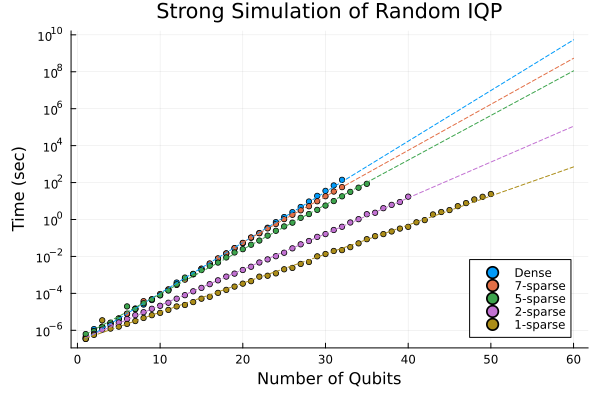

In [118]:


plot(yaxis=:log10,legend=:bottomright
    , size=(600,400),bottom_margin = 3*Plots.mm,left_margin = 3*Plots.mm,yticks=[10.0 .^(-6:2:10)...])#minorgrid=true
title!("Strong Simulation of Random IQP")
ylabel!("Time (sec)")
xlabel!("Number of Qubits")

ms = 3
scatter!(aggregate(dense),label="Dense",markersize=ms)
scatter!(aggregate(sparse7),label="7-sparse",markersize=ms)
scatter!(aggregate(sparse5),label="5-sparse",markersize=ms)
scatter!(aggregate(sparse2),label="2-sparse",markersize=ms)
scatter!(aggregate(sparse1),label="1-sparse",markersize=ms)

plot!(regress(dense),1,60,linestyle=:dash,color=1,label=false)
plot!(regress(sparse7,start=20),20,60,linestyle=:dash,color=2,label=false)
plot!(regress(sparse5),1,60,linestyle=:dash,color=3,label=false)
plot!(regress(sparse2),1,60,linestyle=:dash,color=4,label=false)
plot!(regress(sparse1),1,60,linestyle=:dash,color=5,label=false)
#savefig("Results Strong Simulation of Random IQP extrapolated.pdf")
#plot!(x->0.632-15.51)